In [10]:
#Import library yang diburuhkan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d



In [3]:

# path untuk file dataset
file_path = 'BTC-Daily.csv'

# baca excel
df = pd.read_csv(file_path)

# sampel isi dataset
df.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


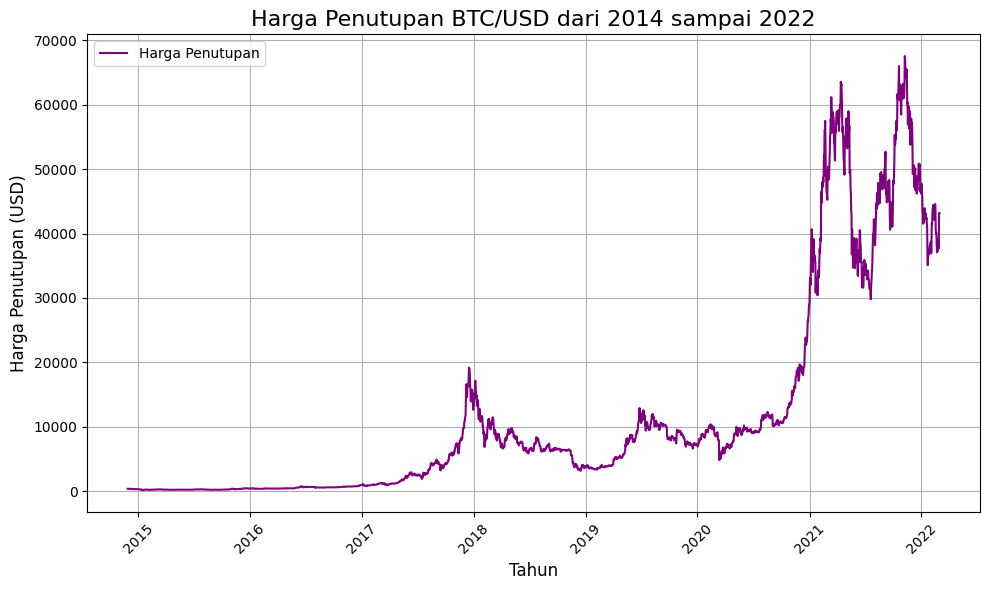

In [7]:
# Mengonversi kolom 'date' menjadi format datetime
df['date'] = pd.to_datetime(df['date'])

# Membuat plot harga penutupan dengan sumbu waktu 'date'
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['close'], label='Harga Penutupan', color='purple')

# Menambahkan judul dan label pada sumbu
plt.title('Harga Penutupan BTC/USD dari 2014 sampai 2022', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Harga Penutupan (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Menampilkan plot dengan tata letak yang rapi
plt.tight_layout()
plt.show()


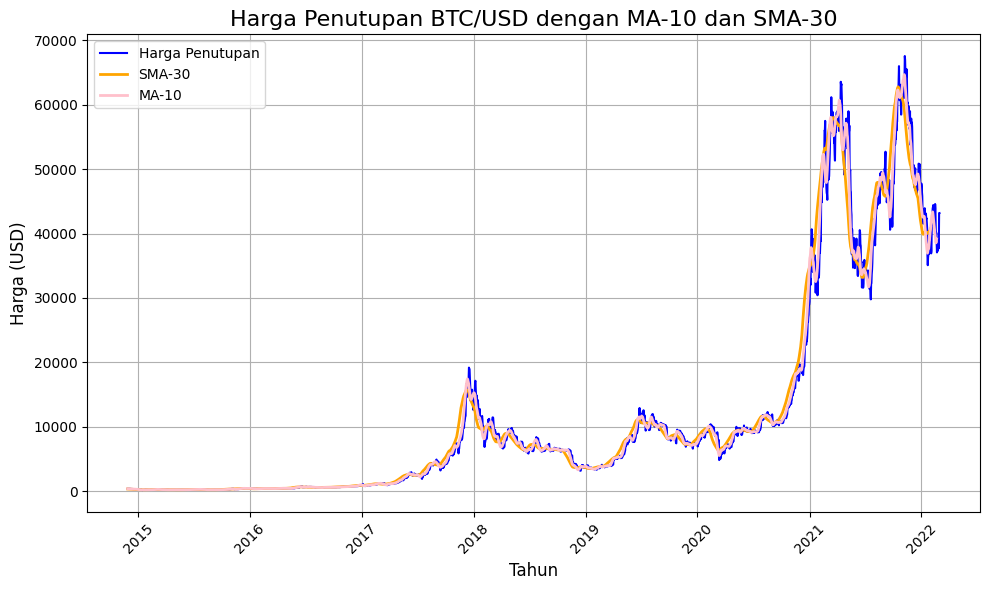

In [9]:
# Menghitung Simple Moving Average (SMA) untuk 30 hari
df['SMA_30'] = df['close'].rolling(window=30).mean()

# Fungsi untuk menghitung Moving Average
def calculate_moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Menghitung Moving Average 10 hari
window_size = 10
ma_10_result = calculate_moving_average(df['close'], window_size)

# Membuat plot harga penutupan dan moving averages
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['close'], label='Harga Penutupan', color='blue', linewidth=1.5)
plt.plot(df['date'], df['SMA_30'], label='SMA-30', color='orange', linewidth=2)
plt.plot(df['date'][window_size-1:], ma_10_result, label='MA-10', color='pink', linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Harga Penutupan BTC/USD dengan MA-10 dan SMA-30', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Harga (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Menampilkan plot dengan tata letak rapi
plt.tight_layout()
plt.show()


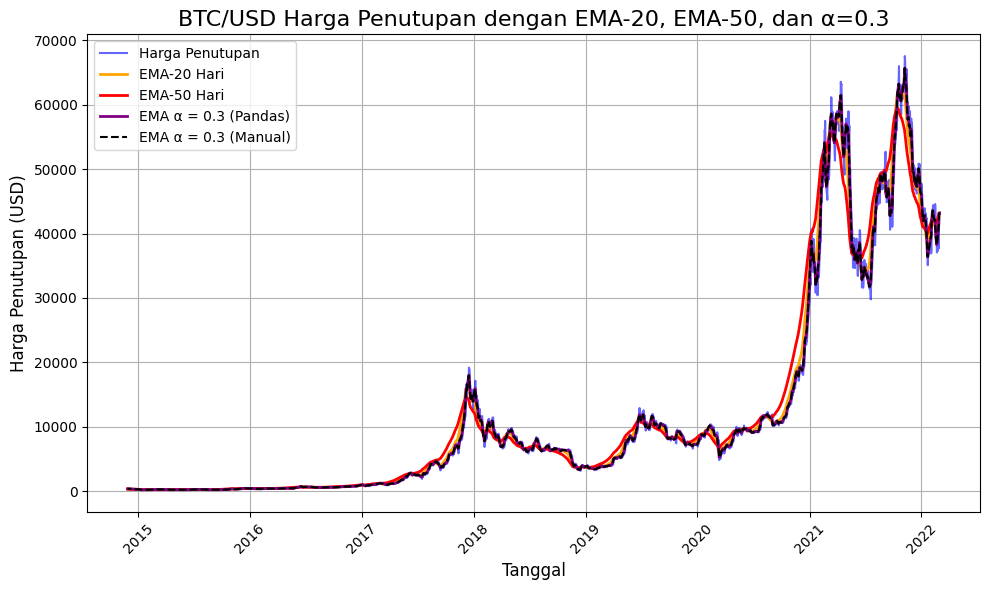

In [11]:
# Menghitung Exponential Moving Average (EMA) untuk 20 hari dan 50 hari
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['close'].ewm(span=50, adjust=False).mean()
df['EMA_Alpha_03'] = df['close'].ewm(alpha=0.3, adjust=False).mean()

# Fungsi untuk menghitung exponential smoothing secara manual
def exponential_smoothing(data, alpha):
    smoothed_data = [data[0]]  # Inisialisasi dengan nilai pertama
    for t in range(1, len(data)):
        smoothed_value = alpha * data[t] + (1 - alpha) * smoothed_data[-1]
        smoothed_data.append(smoothed_value)
    return smoothed_data

# Menghitung hasil smoothing untuk alpha = 0.3
alpha = 0.3
manual_exponential_result = exponential_smoothing(df['close'], alpha)

# Membuat plot harga penutupan dan EMA
plt.figure(figsize=(10,6))

# Plot harga penutupan asli
plt.plot(df['date'], df['close'], label='Harga Penutupan', color='blue', alpha=0.6)

# Plot EMA-20
plt.plot(df['date'], df['EMA_20'], label='EMA-20 Hari', color='orange', linewidth=2)

# Plot EMA-50
plt.plot(df['date'], df['EMA_50'], label='EMA-50 Hari', color='red', linewidth=2)

# Plot EMA dengan alpha = 0.3 menggunakan pandas
plt.plot(df['date'], df['EMA_Alpha_03'], label='EMA α = 0.3 (Pandas)', color='purple', linewidth=2)

# Plot hasil smoothing manual dengan alpha = 0.3
plt.plot(df['date'], manual_exponential_result, label='EMA α = 0.3 (Manual)', color='black', linestyle='--', linewidth=1.5)

# Menambahkan judul dan label pada sumbu
plt.title('BTC/USD Harga Penutupan dengan EMA-20, EMA-50, dan α=0.3', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Harga Penutupan (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Menampilkan plot dengan tata letak rapi
plt.tight_layout()
plt.show()


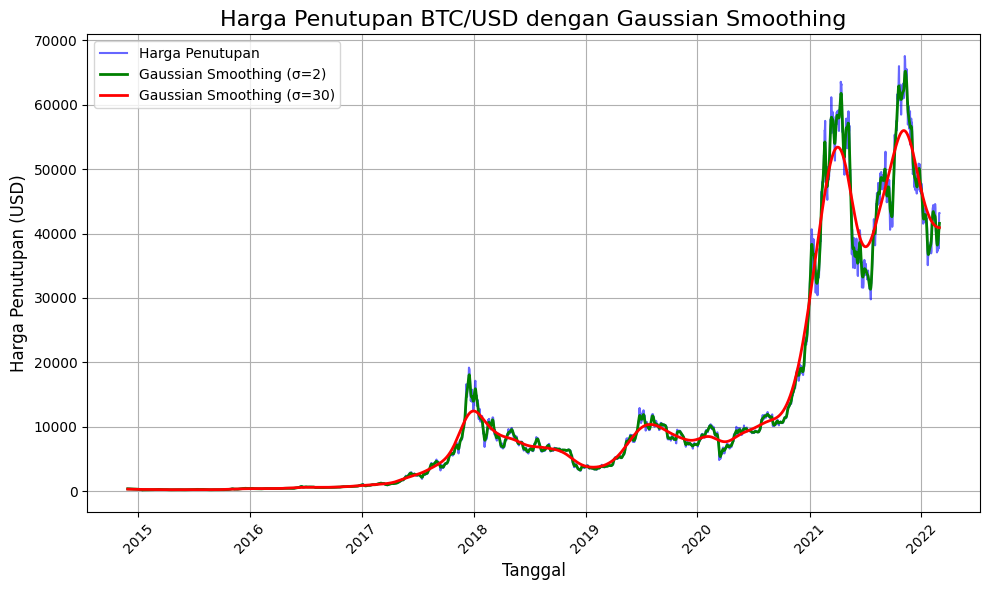

In [12]:
# Menerapkan Gaussian smoothing pada data harga penutupan dengan nilai sigma yang berbeda
df['Gaussian_Sigma_2'] = gaussian_filter1d(df['close'], sigma=2)
df['Gaussian_Sigma_30'] = gaussian_filter1d(df['close'], sigma=30)

# Membuat plot untuk harga penutupan asli dan hasil Gaussian smoothing
plt.figure(figsize=(10,6))

# Plot harga penutupan asli
plt.plot(df['date'], df['close'], label='Harga Penutupan', color='blue', alpha=0.6, linewidth=1.5)

# Plot Gaussian smoothing dengan sigma = 2
plt.plot(df['date'], df['Gaussian_Sigma_2'], label='Gaussian Smoothing (σ=2)', color='green', linewidth=2)

# Plot Gaussian smoothing dengan sigma = 30
plt.plot(df['date'], df['Gaussian_Sigma_30'], label='Gaussian Smoothing (σ=30)', color='red', linewidth=2)

# Menambahkan judul dan label pada sumbu
plt.title('Harga Penutupan BTC/USD dengan Gaussian Smoothing', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Harga Penutupan (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Menampilkan plot dengan tata letak rapi
plt.tight_layout()
plt.show()
